In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
plt.style.use("dark_background")

In [2]:
data = pd.read_csv(
    "houseprice.csv",
    usecols=["Neighborhood", "Exterior1st", "Exterior2nd", "SalePrice"],
)

data.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [3]:
for col in data.columns:
    print(col,data[col].nunique())

Neighborhood 25
Exterior1st 15
Exterior2nd 16
SalePrice 663


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data[["Neighborhood", "Exterior1st", "Exterior2nd"]],
    data["SalePrice"], 
    test_size=0.3,  
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [5]:
y_train.groupby(X_train["Neighborhood"]).mean()

Neighborhood
Blmngtn    198164.500000
Blueste    137500.000000
BrDale      99440.000000
BrkSide    125438.414634
ClearCr    210034.666667
CollgCr    203086.371429
Crawfor    217453.914286
Edwards    125082.676056
Gilbert    192662.290909
IDOTRR      92174.166667
MeadowV    104441.666667
Mitchel    153070.444444
NAmes      146435.264901
NPkVill    140107.142857
NWAmes     192788.235294
NoRidge    336264.666667
NridgHt    307418.137255
OldTown    130958.328767
SWISU      139154.666667
Sawyer     136596.442623
SawyerW    179463.088889
Somerst    226644.196429
StoneBr    309105.937500
Timber     238700.100000
Veenker    229500.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='Neighborhood'>

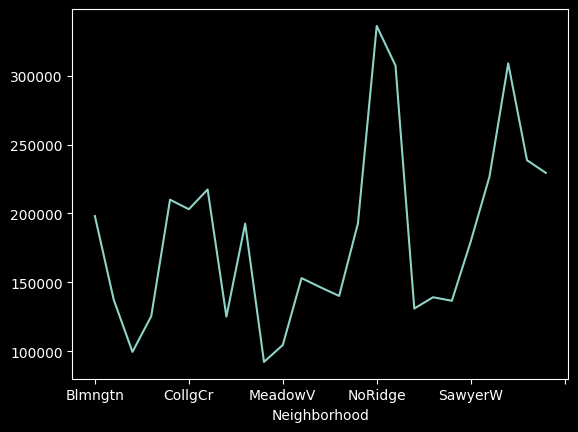

In [6]:
y_train.groupby(X_train["Neighborhood"]).mean().plot()

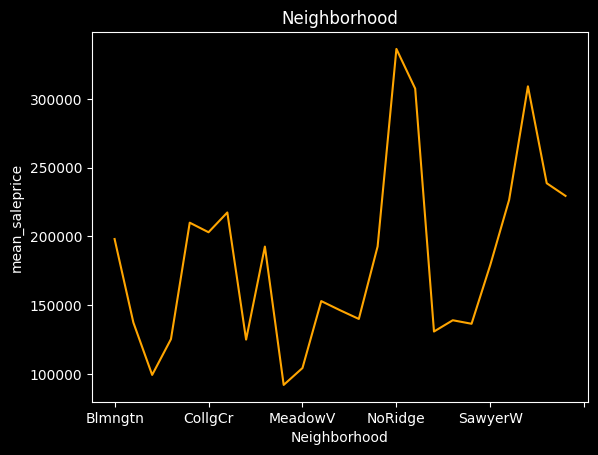

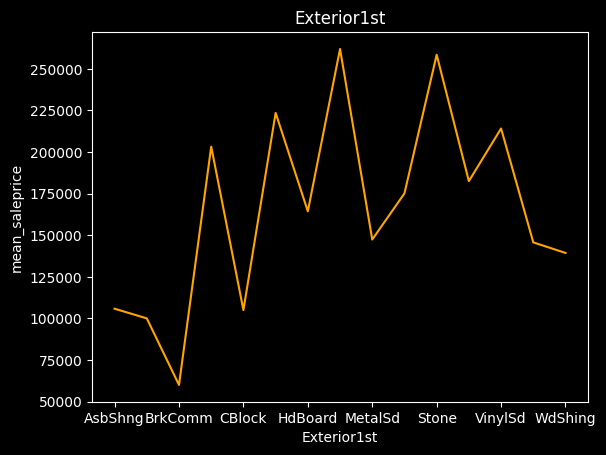

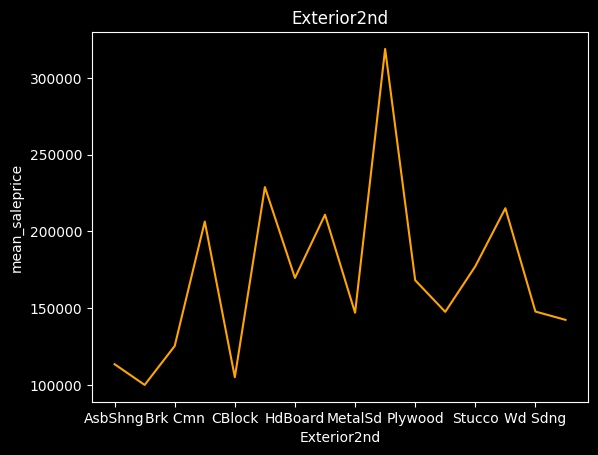

In [7]:
for var in X_train.columns:
    
    fig=plt.figure()
    fig = y_train.groupby(X_train[var]).mean().plot(color ="orange")
    fig.set_title(var)
    fig.set_ylabel("mean_saleprice")
    plt.show()

In [8]:
y_train.groupby(X_train["Neighborhood"]).mean().sort_values()

Neighborhood
IDOTRR      92174.166667
BrDale      99440.000000
MeadowV    104441.666667
Edwards    125082.676056
BrkSide    125438.414634
OldTown    130958.328767
Sawyer     136596.442623
Blueste    137500.000000
SWISU      139154.666667
NPkVill    140107.142857
NAmes      146435.264901
Mitchel    153070.444444
SawyerW    179463.088889
Gilbert    192662.290909
NWAmes     192788.235294
Blmngtn    198164.500000
CollgCr    203086.371429
ClearCr    210034.666667
Crawfor    217453.914286
Somerst    226644.196429
Veenker    229500.000000
Timber     238700.100000
NridgHt    307418.137255
StoneBr    309105.937500
NoRidge    336264.666667
Name: SalePrice, dtype: float64

In [9]:
ordered_labels=y_train.groupby(X_train["Neighborhood"]).mean().sort_values().index
ordered_labels

Index(['IDOTRR', 'BrDale', 'MeadowV', 'Edwards', 'BrkSide', 'OldTown',
       'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes', 'Mitchel', 'SawyerW',
       'Gilbert', 'NWAmes', 'Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor',
       'Somerst', 'Veenker', 'Timber', 'NridgHt', 'StoneBr', 'NoRidge'],
      dtype='object', name='Neighborhood')

In [10]:
ordinal_mapping={k:i for i,k in enumerate(ordered_labels)}
ordinal_mapping

{'IDOTRR': 0,
 'BrDale': 1,
 'MeadowV': 2,
 'Edwards': 3,
 'BrkSide': 4,
 'OldTown': 5,
 'Sawyer': 6,
 'Blueste': 7,
 'SWISU': 8,
 'NPkVill': 9,
 'NAmes': 10,
 'Mitchel': 11,
 'SawyerW': 12,
 'Gilbert': 13,
 'NWAmes': 14,
 'Blmngtn': 15,
 'CollgCr': 16,
 'ClearCr': 17,
 'Crawfor': 18,
 'Somerst': 19,
 'Veenker': 20,
 'Timber': 21,
 'NridgHt': 22,
 'StoneBr': 23,
 'NoRidge': 24}

In [11]:
X_train["Neighborhood"] = X_train["Neighborhood"].map(ordinal_mapping)
X_test["Neighborhood"] = X_test["Neighborhood"].map(ordinal_mapping)

In [12]:
def find_category_mappings(df,variable,target):
    
    ordered_labels = target.groupby(df[variable]).mean().sort_values().index
    return {k:i for i,k in enumerate(ordered_labels)}

def integer_code(train,test,variable,mappings):
    train[variable] = train[variable].map(mappings)
    test[variable] = test[variable].map(mappings)

In [13]:
for variable in ["Exterior1st","Exterior2nd"]:
    mappings = find_category_mappings(X_train,variable,y_train)
    
    integer_code(X_train,X_test,variable,mappings)

In [14]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,16,11,13
682,17,5,7
960,4,5,8
1384,3,4,4
1100,8,5,7


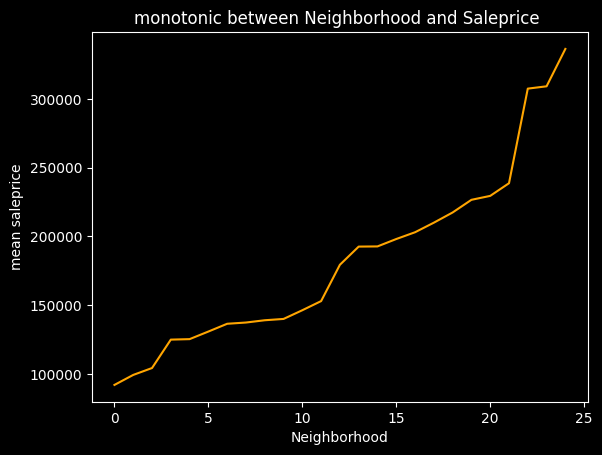

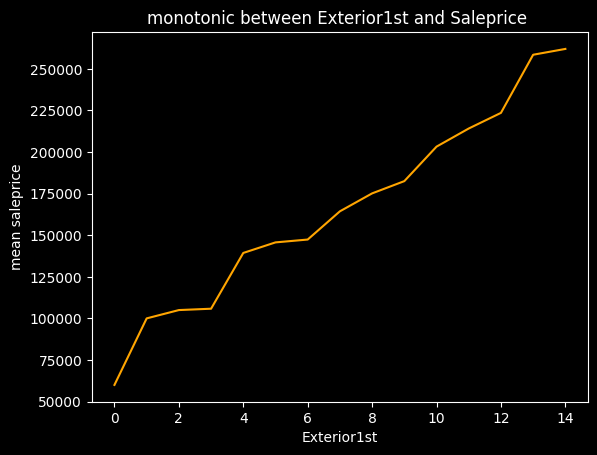

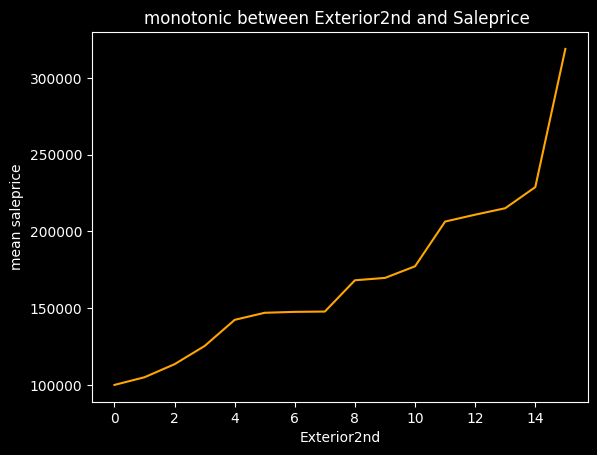

In [15]:
for var in X_train.columns:
    
    plt.figure()
    fig = y_train.groupby(X_train[var]).mean().plot(color = "orange")
    fig.set_title(f"monotonic between {var} and Saleprice ")
    fig.set_ylabel("mean saleprice")
    plt.show()

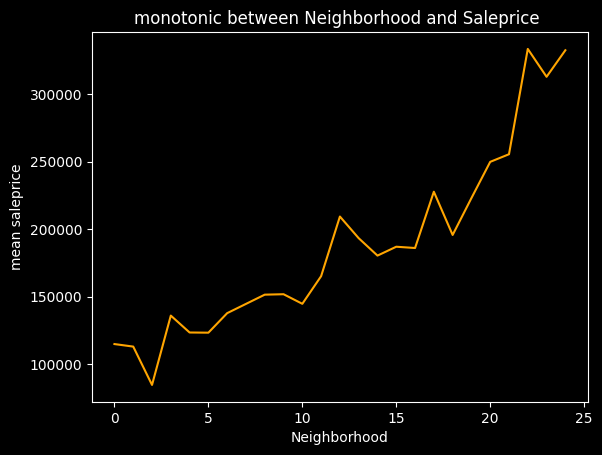

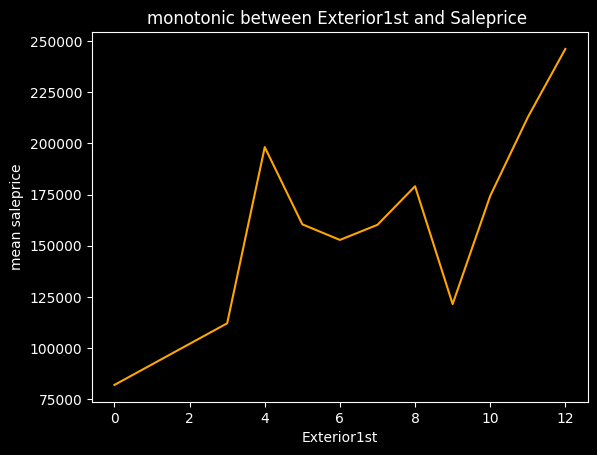

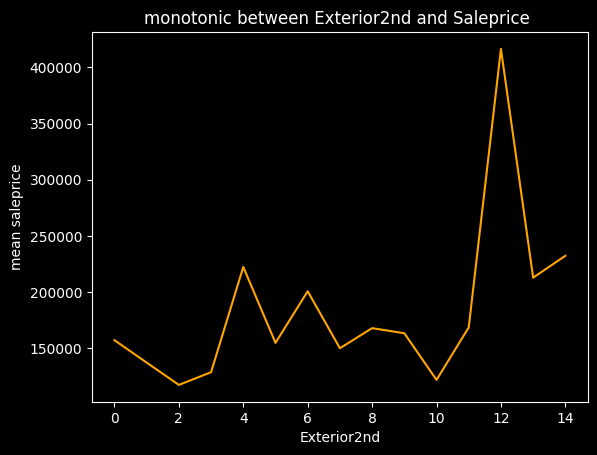

In [16]:
for var in X_test.columns:
    
    plt.figure()
    fig = y_test.groupby(X_test[var]).mean().plot(color = "orange")
    fig.set_title(f"monotonic between {var} and Saleprice ")
    fig.set_ylabel("mean saleprice")
    plt.show()